# Distributions univariées et multivariées

## Résumé

Dans cette page, nous présentons les permettant d'utiliser des lois univariées et multivariées. Pour les lois univariées, nous montrons comment calculer la densité de probabilité, la fonction de répartition, les quantiles. Nous montrons également comment produire des graphiques. 

TODO : 
- montrer la troncature
- computeMinimumVolumeInterval

## Références

- http://openturns.github.io/openturns/master/user_manual/probabilistic_modelling.html

- https://en.wikipedia.org/wiki/Probabilistic_programming_language


## Lois univariées

OpenTURNS procède par programmation probabiliste : on peut créer une variable aléatoire et réaliser des manipulation sur ces variables, *sans* générer d'échantillon. 

In the OpenTURNS platform, several **univariate distributions** are implemeted. Common ones are available such as :
 - `Uniform`,
 - `Normal`,
 - `Beta`, 
 - `LogNormal`, 
 - `Exponential`, 
 - `Weibull`.

Some 'exotics' distributions are also available :
 - `ZipfMandelbrot`
 - `Skellam`
 - `Meixner`

In [1]:
import openturns as ot

## Loi univariée uniforme

Créons une variable uniforme : $\mathcal{U(2,5)}$.

In [2]:
u = ot.Uniform(2,5)

La méthode `drawPDF` permet de dessiner la densité de probabilité.

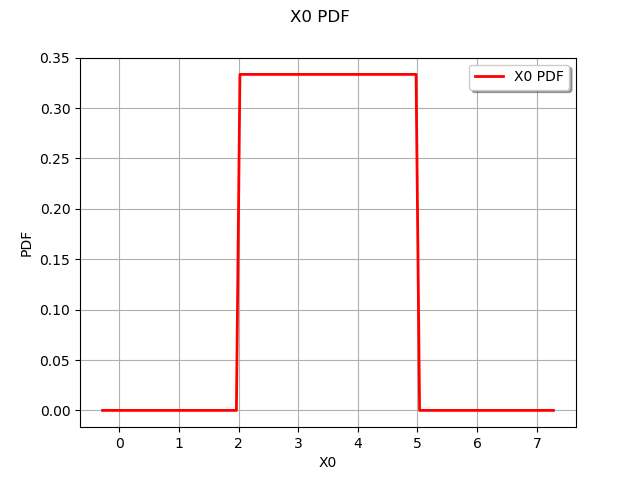

In [3]:
u.drawPDF()

La méthode `computePDF` permet de calculer la densité de probabilité en un point donné. 

In [4]:
u.computePDF(3.5)

0.3333333333333333

La méthode `drawDF` permet de dessiner la fonction de répartition. 

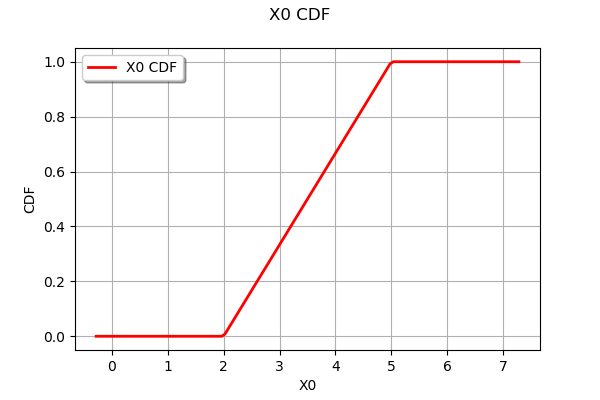

In [5]:
u.drawCDF()

La méthode `computeCDF` calcule la valeur de la fonction de répartition en point.

In [6]:
u.computeCDF(3.5)

0.5

La méthode `getSample` permet de générer un échantillon.

In [7]:
sample = u.getSample(100)
sample

class=Sample name=Uniform implementation=class=SampleImplementation name=Uniform size=100 dimension=1 description=[X0] data=[[3.88963],[4.64842],[2.40583],[2.09751],[3.04117],[4.90827],[4.76204],[3.50912],[2.18962],[2.87827],[4.14315],[3.15009],[3.1213],[4.2118],[4.65051],[2.88498],[4.78553],[4.46243],[4.05372],[4.48408],[3.07941],[4.86424],[3.76585],[2.54612],[2.25735],[3.98218],[2.63133],[3.15869],[2.07368],[3.25676],[4.94552],[4.7484],[4.86681],[3.41885],[2.77958],[3.98402],[3.46932],[3.40557],[2.33323],[3.03596],[3.96793],[4.02527],[4.93694],[3.939],[2.19264],[4.31906],[4.9826],[2.24922],[2.6746],[2.90786],[2.65163],[3.88899],[3.74046],[3.40126],[4.08798],[4.2233],[4.81046],[4.61434],[3.17954],[3.88774],[4.74059],[4.7402],[2.47816],[3.63331],[2.61096],[4.56739],[3.30524],[3.08499],[2.00632],[2.7183],[2.76547],[3.7746],[2.50765],[4.932],[3.44897],[4.12792],[4.87383],[4.10905],[4.46054],[3.44564],[2.6197],[4.25358],[4.77659],[3.90777],[3.80649],[4.10451],[2.23824],[2.757],[4.03093],[3.07536],[3.26039],[2.96406],[4.3958],[3.72669],[2.98616],[4.91505],[3.55288],[2.32346],[4.72337],[4.24923]]

La manière la plus classique d'observer un échantillon consiste à dessiner l'histogramme empirique.

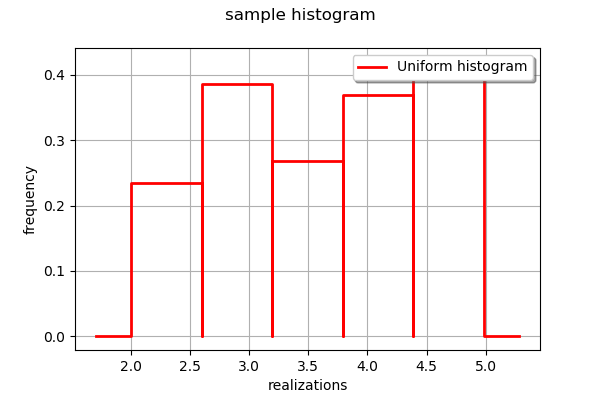

In [8]:
ot.VisualTest_DrawHistogram(sample)

## Lois multivariées

Pour créer des lois multivariées, on peut utiliser deux méthodes :
- certaines distributions sont multivariées par définition : `Normal`, `Dirichlet`, `Student`
- on peut aussi définition une loi multivariée par combinaison :
 - d'une liste de lois marginales univariées.
 - un copule.

Dans le script suivant, nous définissons une loi multivariée en dimension 2 constituée de deux lois marginales gaussienne et uniforme indépendantes.

In [9]:
n = ot.Normal()
u = ot.Uniform()
c = ot.IndependentCopula(2)
d = ot.ComposedDistribution([n, u], c)
d.getSample(10)

class=Sample name=ComposedDistribution implementation=class=SampleImplementation name=ComposedDistribution size=10 dimension=2 description=[X0,X1] data=[[0.00413162,0.912921],[2.6562,0.206932],[0.270297,-0.0194831],[0.449078,-0.121797],[1.32742,-0.739196],[0.546244,0.854672],[0.30214,-0.796992],[-0.60771,-0.348457],[0.0909411,-0.199115],[-0.865828,-0.188678]]

Pour visualiser un nuage de points bi-dimensionnel, on peut utiliser la classe `Cloud`.

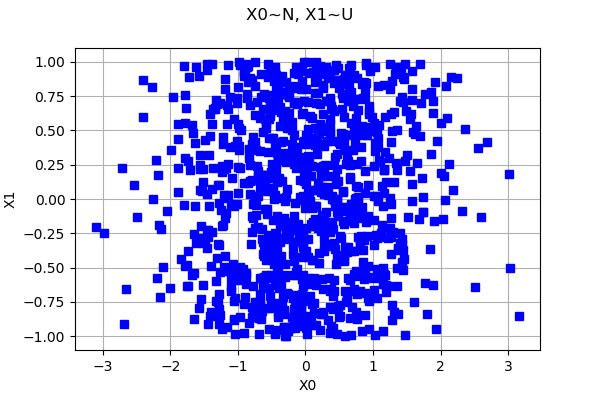

In [10]:
sample = d.getSample(1000)
showAxes = True
graph = ot.Graph("X0~N, X1~U", "X0", "X1", showAxes)
cloud = ot.Cloud(sample, "blue", "fsquare", "") # Create the cloud
graph.add(cloud) # Then, add it to the graph
graph

En fait, le second argument de la classe `ComposedDistribution` est optionnel : si il n'est pas présent, alors la copule est indépendante.

In [11]:
ot.ComposedDistribution([n, u])

class=ComposedDistribution name=ComposedDistribution dimension=2 copula=class=IndependentCopula name=IndependentCopula dimension=2 marginal[0]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] marginal[1]=class=Uniform name=Uniform dimension=1 a=-1 b=1

La classe `NormalCopula` permet de créer une copule gaussienne. Une telle copule est paramétrée par sa matrice de correlation. 

In [12]:
R = ot.CorrelationMatrix(2)
R[0,1] = 0.6
c = ot.NormalCopula(R)
c

class=NormalCopula name=NormalCopula dimension=2 correlation=class=CorrelationMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,0.6,0.6,1]

On peut dessiner les iso-valeurs d'une copule avec la méthode `drawPDF`.

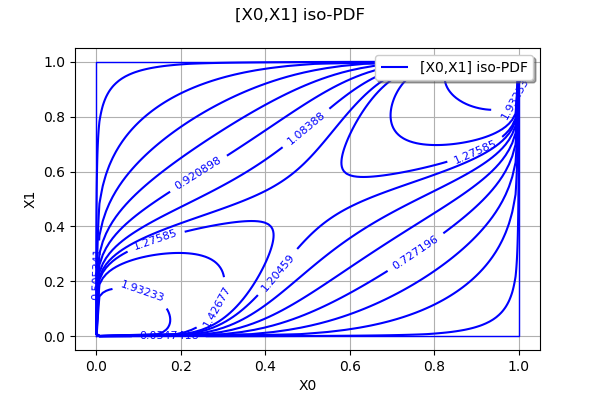

In [13]:
c.drawPDF()

## Exercice 1

- Créer une distribution `Beta` de paramètres suivants :
  - $r=5$ : premier paramètre de forme, 
  - $t=7$ : second paramètre de forme, 
  - $a=9$ : borne inférieure, 
  - $b=10$ : borne supérieure
- Dessiner la PDF, la CDF
- Quelle méthode permet de savoir si cette distribution est continue ?

## Exercice 2

- Créer une variable `Exponential` de moyenne $\lambda=3$.
- Dessiner la PDF, la CDF
- Est-elle continue ?

## Exercice 3

- Créer une variable de Bernoulli telle que :
\begin{align}
P(X=0)&=0.3 \\
P(X=1)&=0.7
\end{align}

En d'autres termes, créer une variable de Bernoulli de paramètre $p=0.3$

- Quel est son support ?

## Exercice 4

It is known that disks produced by a certain company will be defective with probability .01 independently of each other. The company sells the disks in packages of 10 and offers a money-back guarantee that at most 1 of the 10 disks is defective. 
- What proportion of packages is returned? 
- If someone buys three packages, what is the probability that exactly one of them will be returned?

## Exercice 5

Data from the National Oceanic and Atmospheric Administration indicate that the yearly precipitation in Los Angeles is a normal random variable with a mean of 12.08 inches and a standard deviation of 3.1 inches.

Assume that the precipitation totals between two years are independent.

- Find the probability that the precipitation is greater than 15 inches.
- Find the probability that the total precipitation during the next 2 years will exceed 25 inches.
- Find the probability that next year’s precipitation will exceed that of the following year by more than 3 inches. 

## Exercice 6

Références : 
- [1] Statistical Abstract of the United States U.S. Census Bureau. Table 209. Cumulative percent distribution
of population by height and sex : 2007-2008, 2012. https://www.census.gov/compendia/statab/2012/tables/12s0209.pdf
- [2] Mark F. Schilling, Ann E. Watkins, and William Watkins. Is human height bimodal ? The American
Statistician, American Statistical Association, 56(3) :223–229, 2002.

Le bureau de recensement des Etats-Unis fournit des statistiques sur ce pays. La table 209 dans [1] présente la distribution de la population par taille et par sexe. Bien que la question soit controversée [2], on pense que la distribution de la taille des hommes suit approximativement la loi Gaussienne.

Soit X la taille d’un homme dont l’âge est entre 20 et 79 ans D’après les données dans [1], on peut
estimer que la moyenne et l’écart-type sont $\mu = 1.7633$ (m) et $\sigma = 0.0680$ (m).

- Quelle est la probabilité que la taille d’un homme soit inférieure à 2 mètres ? Quelle est la probabilité d'avoir une taille supérieure à 2 mètres ?
- Quel est le quantile de niveau $p=0.99$ ? Quel est son sens physique ?

## Exercice 7

- Build a collection of marginals which includes two normal distributions $X \sim \mathcal{N}(0,1)$;
- Create a ComposedDistribution using the previous collection only;
- Create a ComposedDistribution using the previous collection and a `Copula` structure (independent);
- Create a composedDistribution using the previous collection and a `Copula` structure (Normal copula with $\rho=0.6$);
- Get a `Sample` of size $1000$; plot it.

## Annexe : dessiner plusieurs distributions dans un même graphique

In [43]:
myPDFBeta = myBeta.drawPDF()
myCDFBeta = myBeta.drawCDF()
myPDFExp = myExponential.drawPDF()
myCDFExp = myExponential.drawCDF()

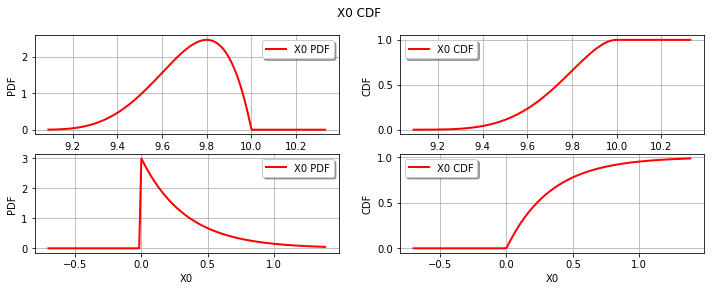

In [44]:
fig = plt.figure(figsize=(12, 4))
ax_pdf = fig.add_subplot(2, 2, 1)
_ = ot.viewer.View(myPDFBeta, figure=fig, axes=[ax_pdf])
ax_cdf = fig.add_subplot(2, 2, 2)
_ = ot.viewer.View(myCDFBeta, figure=fig, axes=[ax_cdf])
ax_pdf_exp = fig.add_subplot(2, 2, 3)
_ = ot.viewer.View(myPDFExp, figure=fig, axes=[ax_pdf_exp])
ax_cdf_exp = fig.add_subplot(2, 2, 4)
_ = ot.viewer.View(myCDFExp, figure=fig, axes=[ax_cdf_exp])